In [1]:
import sys
sys.path.append('/home/lev/')

import torch
import numpy as np
import matplotlib.pyplot as plt

import json
import IPython.display
import IPython.display as ipd

from radiomixer.sampler.filesampler import FileSampler
from radiomixer.io.loader.loaders import ClassicLoader, TIMITLoader
from radiomixer.config.configloader import create_config_loader
from radiomixer.creator.transformchaincreator import TransformsChainCreator
from radiomixer.creator.transformfacory import TransformFactory

from radiomixer.transforms.mixer.mixers import CustomMixer



def Audio(audio: np.ndarray, sr: int):
    """
    Use instead of IPython.display.Audio as a workaround for VS Code.
    `audio` is an array with shape (channels, samples) or just (samples,) for mono.
    """

    if np.ndim(audio) == 1:
        channels = [audio.tolist()]
    else:
        channels = audio.tolist()

    return IPython.display.HTML("""
        <script>
            if (!window.audioContext) {
                window.audioContext = new AudioContext();
                window.playAudio = function(audioChannels, sr) {
                    const buffer = audioContext.createBuffer(audioChannels.length, audioChannels[0].length, sr);
                    for (let [channel, data] of audioChannels.entries()) {
                        buffer.copyToChannel(Float32Array.from(data), channel);
                    }
            
                    const source = audioContext.createBufferSource();
                    source.buffer = buffer;
                    source.connect(audioContext.destination);
                    source.start();
                }
            }
        </script>
        <button onclick="playAudio(%s, %s)">Play</button>
    """ % (json.dumps(channels), sr))




from radiomixer.io.saver.savers import WaveFeaturesSaver
def init(configs):
    print(configs)
    loader_types = {
            "ClassicLoader": ClassicLoader,
            "TIMITLoader": TIMITLoader,
            }
    saver_types = {
            "WaveFeaturesSaver": WaveFeaturesSaver
            }
    fileSampler = FileSampler(configs=configs["FileSampler"])

    loader_module = loader_types.get(configs["FileLoader"]["type"])
    loader = loader_module(cfg = configs["FileLoader"]["configs"]) 
    
    transform_factory = TransformFactory()
    transforms_chain_creator = TransformsChainCreator(transform_factory)

    transforms_chain = transforms_chain_creator.create(configs["transform_chain"])
    

    return fileSampler, loader, transforms_chain

def preprocess(fileSampler, loader, transforms_chain):
    file_paths, dataset_names = fileSampler.sample_files()
    signals = loader.seq_load(file_paths, dataset_names)
    signals = transforms_chain.process(signals)
    return signals

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [3]:
import sys
from pathlib import Path
sys.path.append(str(Path(__file__).parent))

NameError: name '__file__' is not defined

In [11]:
from pathlib import Path

Path(os.getcwd()).parent.parent

PosixPath('/home/lev')

In [6]:
os.getcwd().pare

AttributeError: 'str' object has no attribute 'parent'

In [5]:
sys.path.append(os.getcwd())

'/home/lev/radiomixer/notebooks'

{'FileLoader': {'type': 'TIMITLoader', 'configs': {'sample_rate': 16000, 'remove_silence': False, 'normalize': True, 'min_duration': 4}}, 'FileSaver': {'type': 'WaveFeaturesSaver', 'configs': {}}, 'SequentialFileProcessor': {'num_files_generate': 20, 'save_dir': '/home/lev/radiomixer/Datasets/example', 'save_config_dir': '/home/lev/radiomixer/Datasets/example'}, 'FileSampler': {'dataset_split': 'test', 'test_size': 0.25, 'seed': 42, 'dataset_dirs': ['/home/lev/datasets/TIMIT/data/TRAIN', '/home/lev/datasets/TIMIT/data/TRAIN', '/home/lev/datasets/TIMIT/data/TRAIN', '/home/lev/datasets/TIMIT/data/TRAIN'], 'dataset_names': ['speech1', 'speech2', 'speech3', 'speech4'], 'min_datasets': 2, 'dataset_prob': [0.25, 0.25, 0.25, 0.25], 'replace': False}, 'transform_chain': {'EqualSegmentSampler': {'sampling_rate': 16000, 'final_audio_clip_duration': 4, 'segment_min_duration': 1}, 'TransitionOverlapedSegmentsParametersSampler': {'max_fade_in': 0.45, 'min_fade_in': 0.1, 'in_transition_type': ['line

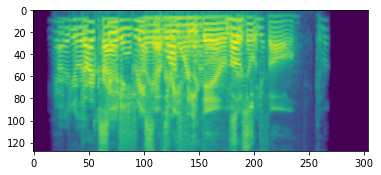

AUDIO 1


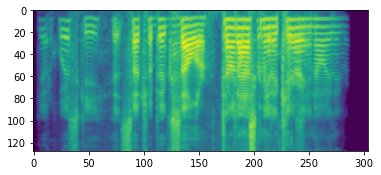

In [2]:
config_file = '/home/lev/radiomixer/notebooks/toy_yaml/SamplerExperiments.yaml'
config_loader = create_config_loader()
configs = config_loader.load(config_file)
fileSampler, loader, transforms_chain = init(configs)



for i in range(2):
    signal = preprocess(fileSampler, loader, transforms_chain)
    print(f'AUDIO {i}')
    plt.plot(signal.data[0])
    plt.imshow(signal.data_features[0])
    ipd.display(Audio(signal.data[0], signal.sample_rate))
    plt.show()